In [109]:
import sys
import random as rnd
from prisonerClasses import Player
from pylab import *
import operator

def Payoff(player1_choice, player2_choice):
    
    ###############################################################################################################
    ### FUNCTION DESIGNED TO PLAY PRISONERS DILEMMA https://en.wikipedia.org/wiki/Prisoner%27s_dilemma          ###
    ### THIS ENTIRE FUNCTION IS DESIGNED TO RUN BEHIND THE SCENES; FANCY CODE IS ALLOWED AS LONG AS PREMISES OF ###
    ### PRISONERS DILEMMA ARE CONSERVED.                                                                        ###
    ###############################################################################################################
    
    import time
    #time.sleep(0.5)
    
    ### Infers conceptual choice of players and checks for errors                                               ###
    ### 0 is cooperation, 1 is defection                                                                        ###
    if player1_choice == 0:
        print ("Player 1 cooperates!")
    elif player1_choice == 1:
        print("Player 1 defects!")
    else:
        print("Invalid value provided for Player 1")
        return
               
    if player2_choice == 0:
        print ("Player 2 cooperates!")
    elif player2_choice == 1:
        print("Player 2 defects!")
    else:
        print("Invalid value provided for Player 2")
        return
    
    ### Establishes payoff matrix ###
    #payoffs = [[[-1, -1], [0, -3]],[[-3, 0], [-2, -2]]] ### ALTERNATIVE PAYOFF MATRIX USING NEGATIVES / 10
    
    payoffs = np.asarray([[[20, 20], [30, 0]],[[0, 30], [10, 10]]])  ### ALTERNATIVE PAYOFF MATRIX USING POSITIVES
    
    ### Creates and assigns score to new variable for each player ###
    player1_score = payoffs[player1_choice][player2_choice][1]
    player2_score = payoffs[player1_choice][player2_choice][0]
    
    ### Prints score for each player for the current round ###
    print("Player 1 score:", player1_score)
    print("Player 2 score:", player2_score)
    print("")
    
    ### Returns both the choices of each player and the score of each player. The choice is returned in order to make
    ### the design of a responsive algorithm easier, removing the need to infer the choice from received score
    return (player1_score, player2_score)

def GamePrinter(timesteps, allscores, list_of_players):
    colors = ['b-', 'g-', 'r-', 'c-', 'm-', 'y-', 'k-']
    markers = [".", ",", "o", "v", "^", "<", ">", "1", "2", "3", "4", "8", "s", "p", "P", "*", "h", "H", "+", "x", "X", "D", "d", "|", "_",]
    i = 0
    for key in allscores:
        color = colors[i%len(colors)]
        color += markers[i%len(markers)]
        plt.plot(timesteps, allscores[key], color, label = key)
        i += 1
    xticks(timesteps)
    yticks(np.arange(0,500,25))
    legend()
    savefig('foo.png', bbox_inches='tight', dpi=300)
    plt.show()
    
def Elimination():
    
    return parents, scores


In [ ]:
scores = {"cooperator": 0, "defector": 0, "randomy": 0, "opposite": 0, "mefirst": 0, "happyflop": 0, "angryflop": 0, "grudgy": 0, "tit4tat": 0}

In [ ]:
player1_total = 0
player2_total = 0

name1 = str(input("Input strategy of player 1: "))
name1 = name1.lower()
name2 = str(input("Input strategy of player 2: "))
name2 = name2.lower()

if name1 not in scores or name2 not in scores:
    sys.exit("Unrecognized players %s, %s check scores dictionary for names." % (name1, name2))

player1 = Player(name1)
player2 = Player(name2)

all_choices = [[],[]]

player1_prev_choice = None
player2_prev_choice = None

for i in range(20):
    player1_send = player1.Play(all_choices, 0, i)
    player2_send = player2.Play(all_choices, 1, i)
    
    if player1_send == 3:
        print("Player 1 reported an error")
        continue
    if player2_send == 3:
        print("Player 2 reported an error")
        continue
        
    player1_rec, player2_rec = Payoff(player1_send, player2_send)
    print(player1_rec)
    
    all_choices[0].append(player1_send)
    all_choices[1].append(player2_send)
    
    player1_total += player1_rec
    player2_total += player2_rec
    
    
print("Player 1 %s total %i\nPlayer 2 %s total %i" % (name1.capitalize(), player1_total, name2.capitalize(), player2_total))
print("All games: %s" % all_choices)
scores[name1] += player1_total
scores[name2] += player2_total

In [ ]:
scores

### Conditions: ###

* The code must be written as a function
* The function must match the provided prototype, accepting the exact arguments given
* The function must handle both starting as player 1 and as player 2 and subsequent play
* No global variables are allowed
* The function must return the integer 0 or 1, and nothing else
* Your code must be able to play against the various strategies specified in the problem set without causing the program to crash. This is an essential precondition for the final experiment.
 
Prototype:
def func(previous_games, player_number, round):
    # some code handling the input and deciding on output
      'previous_games' is a nested list of all previous choices in the same round of games
      previous_games[0][i] is the choice of player 1 in game i, whereas
      previous_games[1][i] is the choice of player 2 in game i
      player_number is an integer 0 or 1 telling the function whether it plays as 
      player 1 or player 2, respectively
      The 'round' variable starts at 0 and tells the function which round is currently being played.
      
    return my_decision
    


In [18]:
allplayers = []
for key in scores:
    allplayers.append(key)
print(allplayers)

['cooperator', 'defector', 'randomy', 'opposite', 'mefirst', 'happyflop', 'angryflop', 'grudgy', 'tit4tat', 'tit42tat', 'trapper', 'smarttrapper']


In [108]:
#allplayers = ["cooperator", "defector", "randomy", "opposite", "mefirst", "happyflop", "angryflop", "grudgy", "tit4tat"]
#allplayers = ["defector", "tit4tat", "grudgy", "tit42tat", "tit4tat", "trapper", "smarttrapper"]
allplayers = []
allplayers_allrounds = [allplayers]
for key in scores:
    allplayers.append(key)
print(allplayers)
howmanyplays = {"cooperator": 0, "defector": 0, "randomy": 0, "opposite": 0, "mefirst": 0, "happyflop": 0, "angryflop": 0, "grudgy": 0, "tit4tat": 0, "tit42tat": 0, "trapper": 0, "smarttrapper": 0}
scores = {"cooperator": 0, "defector": 0, "randomy": 0, "opposite": 0, "mefirst": 0, "happyflop": 0, "angryflop": 0, "grudgy": 0, "tit4tat": 0, "tit42tat": 0, "trapper": 0, "smarttrapper" : 0}


['cooperator', 'defector', 'randomy', 'opposite', 'mefirst', 'happyflop', 'angryflop', 'grudgy', 'tit4tat', 'tit42tat', 'trapper', 'smarttrapper']


Round 1 with the current strategies: ['grudgy', 'grudgy', 'grudgy', 'grudgy', 'grudgy', 'grudgy', 'tit4tat', 'tit4tat', 'tit42tat', 'tit42tat', 'tit42tat', 'tit42tat']
Grudgy VS Grudgy
Grudgy chosen!
Grudgy chosen!
Player 1 cooperates!
Player 2 cooperates!
Player 1 score: 20
Player 2 score: 20

Player 1 cooperates!
Player 2 cooperates!
Player 1 score: 20
Player 2 score: 20

Player 1 cooperates!
Player 2 cooperates!
Player 1 score: 20
Player 2 score: 20

Player 1 cooperates!
Player 2 cooperates!
Player 1 score: 20
Player 2 score: 20

Player 1 cooperates!
Player 2 cooperates!
Player 1 score: 20
Player 2 score: 20

Player 1 cooperates!
Player 2 cooperates!
Player 1 score: 20
Player 2 score: 20

Player 1 cooperates!
Player 2 cooperates!
Player 1 score: 20
Player 2 score: 20

Player 1 cooperates!
Player 2 cooperates!
Player 1 score: 20
Player 2 score: 20

Player 1 cooperates!
Player 2 cooperates!
Player 1 score: 20
Player 2 score: 20

Player 1 cooperates!
Player 2 cooperates!
Player 1 score

Player 2 score: 20

Player 1 cooperates!
Player 2 cooperates!
Player 1 score: 20
Player 2 score: 20

Player 1 cooperates!
Player 2 cooperates!
Player 1 score: 20
Player 2 score: 20

Player 1 cooperates!
Player 2 cooperates!
Player 1 score: 20
Player 2 score: 20

Player 1 cooperates!
Player 2 cooperates!
Player 1 score: 20
Player 2 score: 20

Tit42tat chosen!
Grudgy chosen!
Player 1 cooperates!
Player 2 cooperates!
Player 1 score: 20
Player 2 score: 20

Player 1 cooperates!
Player 2 cooperates!
Player 1 score: 20
Player 2 score: 20

Player 1 cooperates!
Player 2 cooperates!
Player 1 score: 20
Player 2 score: 20

Player 1 cooperates!
Player 2 cooperates!
Player 1 score: 20
Player 2 score: 20

Player 1 cooperates!
Player 2 cooperates!
Player 1 score: 20
Player 2 score: 20

Player 1 cooperates!
Player 2 cooperates!
Player 1 score: 20
Player 2 score: 20

Player 1 cooperates!
Player 2 cooperates!
Player 1 score: 20
Player 2 score: 20

Player 1 cooperates!
Player 2 cooperates!
Player 1 score:

Player 2 score: 20

Player 1 cooperates!
Player 2 cooperates!
Player 1 score: 20
Player 2 score: 20

Player 1 cooperates!
Player 2 cooperates!
Player 1 score: 20
Player 2 score: 20

Player 1 cooperates!
Player 2 cooperates!
Player 1 score: 20
Player 2 score: 20

Player 1 cooperates!
Player 2 cooperates!
Player 1 score: 20
Player 2 score: 20

Player 1 cooperates!
Player 2 cooperates!
Player 1 score: 20
Player 2 score: 20

Grudgy VS Tit42tat
Grudgy chosen!
Tit42tat chosen!
Player 1 cooperates!
Player 2 cooperates!
Player 1 score: 20
Player 2 score: 20

Player 1 cooperates!
Player 2 cooperates!
Player 1 score: 20
Player 2 score: 20

Player 1 cooperates!
Player 2 cooperates!
Player 1 score: 20
Player 2 score: 20

Player 1 cooperates!
Player 2 cooperates!
Player 1 score: 20
Player 2 score: 20

Player 1 cooperates!
Player 2 cooperates!
Player 1 score: 20
Player 2 score: 20

Player 1 cooperates!
Player 2 cooperates!
Player 1 score: 20
Player 2 score: 20

Player 1 cooperates!
Player 2 cooperat

Player 1 score: 20
Player 2 score: 20

Player 1 cooperates!
Player 2 cooperates!
Player 1 score: 20
Player 2 score: 20

Player 1 cooperates!
Player 2 cooperates!
Player 1 score: 20
Player 2 score: 20

Player 1 cooperates!
Player 2 cooperates!
Player 1 score: 20
Player 2 score: 20

Grudgy VS Tit42tat
Grudgy chosen!
Tit42tat chosen!
Player 1 cooperates!
Player 2 cooperates!
Player 1 score: 20
Player 2 score: 20

Player 1 cooperates!
Player 2 cooperates!
Player 1 score: 20
Player 2 score: 20

Player 1 cooperates!
Player 2 cooperates!
Player 1 score: 20
Player 2 score: 20

Player 1 cooperates!
Player 2 cooperates!
Player 1 score: 20
Player 2 score: 20

Player 1 cooperates!
Player 2 cooperates!
Player 1 score: 20
Player 2 score: 20

Player 1 cooperates!
Player 2 cooperates!
Player 1 score: 20
Player 2 score: 20

Player 1 cooperates!
Player 2 cooperates!
Player 1 score: 20
Player 2 score: 20

Player 1 cooperates!
Player 2 cooperates!
Player 1 score: 20
Player 2 score: 20

Player 1 cooperates

Player 1 cooperates!
Player 2 cooperates!
Player 1 score: 20
Player 2 score: 20

Player 1 cooperates!
Player 2 cooperates!
Player 1 score: 20
Player 2 score: 20

Player 1 cooperates!
Player 2 cooperates!
Player 1 score: 20
Player 2 score: 20

Tit42tat VS Tit42tat
Tit42tat chosen!
Tit42tat chosen!
Player 1 cooperates!
Player 2 cooperates!
Player 1 score: 20
Player 2 score: 20

Player 1 cooperates!
Player 2 cooperates!
Player 1 score: 20
Player 2 score: 20

Player 1 cooperates!
Player 2 cooperates!
Player 1 score: 20
Player 2 score: 20

Player 1 cooperates!
Player 2 cooperates!
Player 1 score: 20
Player 2 score: 20

Player 1 cooperates!
Player 2 cooperates!
Player 1 score: 20
Player 2 score: 20

Player 1 cooperates!
Player 2 cooperates!
Player 1 score: 20
Player 2 score: 20

Player 1 cooperates!
Player 2 cooperates!
Player 1 score: 20
Player 2 score: 20

Player 1 cooperates!
Player 2 cooperates!
Player 1 score: 20
Player 2 score: 20

Player 1 cooperates!
Player 2 cooperates!
Player 1 sco

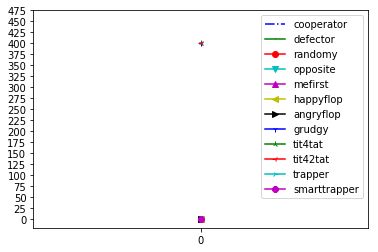

In [105]:
iterations = 1
generation_scores = {"cooperator": zeros(iterations), "defector": zeros(iterations), "randomy": zeros(iterations), "opposite": zeros(iterations), "mefirst": zeros(iterations), "happyflop": zeros(iterations), "angryflop": zeros(iterations), "grudgy": zeros(iterations), "tit4tat": zeros(iterations), "tit42tat": zeros(iterations), "trapper": zeros(iterations), "smarttrapper" : zeros(iterations)}
timeline = []

for current_game in range(iterations):
    print("Round %i with the current strategies: %s" % (iterations, allplayers))
    howmanyplays = {"cooperator": 0, "defector": 0, "randomy": 0, "opposite": 0, "mefirst": 0, "happyflop": 0, "angryflop": 0, "grudgy": 0, "tit4tat": 0, "tit42tat": 0, "trapper": 0, "smarttrapper": 0}
    scores = {"cooperator": 0, "defector": 0, "randomy": 0, "opposite": 0, "mefirst": 0, "happyflop": 0, "angryflop": 0, "grudgy": 0, "tit4tat": 0, "tit42tat": 0, "trapper": 0, "smarttrapper" : 0}
    for i in range(len(allplayers)-1):
        element = allplayers[i]

        for n in range((i+1), (len(allplayers)),1):
            print("%s VS %s" % (element.capitalize(), allplayers[n].capitalize()))
            howmanyplays[element] +=1
            howmanyplays[allplayers[n]] += 1

            for x in range(2):
                if x == 0:
                    name1 = element
                    name2 = allplayers[n]
                    #print("player 1 is now %s" % name1)
                    #print("player 2 is now %s \n" % name2)
                elif x == 1:
                    name1 = allplayers[n]
                    name2 = element
                    #print("player 1 is now %s" % name1)
                    #print("player 2 is now %s \n" % name2)

                name1 = name1.lower()
                name2 = name2.lower()

                if name1 not in scores or name2 not in scores:
                    sys.exit("Unrecognized players %s, %s check scores dictionary for names." % (name1, name2))

                player1 = Player(name1)
                player2 = Player(name2)

                all_choices = [[],[]]

                player1_prev_choice = None
                player2_prev_choice = None
                player1_total = 0
                player2_total = 0

                for j in range(10):
                    player1_send = player1.Play(all_choices, 0, j)
                    player2_send = player2.Play(all_choices, 1, j)

                    if player1_send == 3:
                        print("Player 1 reported an error")
                        continue
                    if player2_send == 3:
                        print("Player 2 reported an error")
                        continue

                    player1_rec, player2_rec = Payoff(player1_send, player2_send)

                    all_choices[0].append(player1_send)
                    all_choices[1].append(player2_send)

                    #print("Giving %i points to player 1: %s" % (player1_rec, name1))
                    player1_total += player1_rec
                    #print("Giving %i points to player 2: %s" % (player2_rec, name2))
                    player2_total += player2_rec

                    scores[name1] += player1_rec
                    scores[name2] += player2_rec



    #print("i is %i \n" % i)
    #print("Number of games played for each player: %s \n" % howmanyplays)

    for key in scores:
        if howmanyplays[key] == 0:
            continue
        scores[key] = (scores[key]/howmanyplays[key])
        generation_scores[key][current_game] = round(scores[key], 2)

    #print("Total scores %s " % scores)
    for name in allplayers:
        print("Strat: {}   \tAvg pts: {:.2f}".format(name, scores[name]))
        
    sorted_d = sorted(scores.items(), key=operator.itemgetter(1))
    
    p_generation = []
    for element in sorted_d:
        if howmanyplays[element[0]] == 0:
            continue
        else:
            print(element[1])
            for i in range(allplayers.count(element[0])):
                p_generation.append(element[0])
        
    p_size = len(p_generation)
    allplayers = list(p_generation[2:])
    allplayers.extend(p_generation[-2:])
    print(allplayers)
    
    
    allplayers_allrounds.append(allplayers)
    timeline.append(current_game)
    print("Timeline ", timeline)

GamePrinter(timeline, generation_scores, allplayers_allrounds)

In [100]:
print(generation_scores)

{'cooperator': array([0.]), 'defector': array([257.27]), 'randomy': array([190.]), 'opposite': array([0.]), 'mefirst': array([221.82]), 'happyflop': array([0.]), 'angryflop': array([0.]), 'grudgy': array([283.64]), 'tit4tat': array([270.]), 'tit42tat': array([279.09]), 'trapper': array([250.91]), 'smarttrapper': array([254.55])}


In [97]:
for name in allplayers:
    print("Strat: {}   \tAvg pts: {:.2f}".format(name, scores[name]))

Strat: opposite   	Avg pts: 260.91
Strat: angryflop   	Avg pts: 263.64
Strat: randomy   	Avg pts: 284.55
Strat: mefirst   	Avg pts: 296.36
Strat: tit4tat   	Avg pts: 299.09
Strat: trapper   	Avg pts: 302.73
Strat: smarttrapper   	Avg pts: 322.73
Strat: tit42tat   	Avg pts: 328.18
Strat: grudgy   	Avg pts: 340.91
Strat: defector   	Avg pts: 367.27
Strat: grudgy   	Avg pts: 340.91
Strat: defector   	Avg pts: 367.27


In [107]:
sorted_d = sorted(scores.items(), key=operator.itemgetter(1))
print(sorted_d)

[('cooperator', 0), ('defector', 0), ('randomy', 0), ('opposite', 0), ('mefirst', 0), ('happyflop', 0), ('angryflop', 0), ('trapper', 0), ('smarttrapper', 0), ('grudgy', 400.0), ('tit4tat', 400.0), ('tit42tat', 400.0)]


In [106]:
p_generation = []
print(allplayers)
for element in sorted_d:
    if howmanyplays[element[0]] == 0:
        continue
    else:
        print(element[1])
        for i in range(allplayers.count(element[0])):
            p_generation.append(element[0])
        
p_size = len(p_generation)
allplayers = list(p_generation[2:])
allplayers.extend(p_generation[-2:])
print(allplayers)


['grudgy', 'grudgy', 'grudgy', 'grudgy', 'tit4tat', 'tit4tat', 'tit42tat', 'tit42tat', 'tit42tat', 'tit42tat', 'tit42tat', 'tit42tat']
400.0
400.0
400.0
['grudgy', 'grudgy', 'tit4tat', 'tit4tat', 'tit42tat', 'tit42tat', 'tit42tat', 'tit42tat', 'tit42tat', 'tit42tat', 'tit42tat', 'tit42tat']


In [101]:
p_generation

['randomy',
 'mefirst',
 'trapper',
 'smarttrapper',
 'defector',
 'defector',
 'defector',
 'defector',
 'tit4tat',
 'tit42tat',
 'grudgy',
 'grudgy']

In [102]:
next_generation = []
next_generation = list(p_generation[2:])
print(next_generation)
next_generation.extend(p_generation[-2:])
print(next_generation)

['smarttrapper', 'tit4tat', 'grudgy', 'tit42tat']
['smarttrapper', 'tit4tat', 'grudgy', 'tit42tat', 'grudgy', 'tit42tat']


In [ ]:
%whos

In [ ]:
dir(Player)

In [22]:
help(round)

Help on built-in function round in module builtins:

round(...)
    round(number[, ndigits]) -> number
    
    Round a number to a given precision in decimal digits (default 0 digits).
    This returns an int when called with one argument, otherwise the
    same type as the number. ndigits may be negative.



In [29]:
0 % 2

0